In [1]:
#### Reference paper https://arxiv.org/abs/1808.08219

#### Keeping tau_i fixed and then calculating y_i as per the value of 
#### tau_i.


import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.optimize import fsolve
from adaptive_integrator import integrate
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})


# Reference paper https://arxiv.org/abs/1808.08219
# Referencing from Eq.(3.2) to Eq.(3.7) in https://arxiv.org/abs/1808.08219
# Only using the dimensionless equations
# Using PBH as the sole source og Gravitational potential
# Explicitly adding Hubble expansion (or deceleration term) in RD with H(t)=1/2t
# so that v_i = H r_i .
# Using either solve_ivp or adaptive integrator as the differential equation solver


π = np.pi
Ω_cdm = 0.85
G = 6.67e-11                # in units of m^3⋅kg^−1⋅s^−2
t_i = 2.358e5                # in units of seconds
t_eq = 1.5923e12            # in units of seconds
ρ_eq = 2.1548e-16          # in units of kg m^-3
M_solar = 1.989e30        # in units of kg
c = 3e8                 #in units of m/s
A = 1.495e11                 # Astronomical unit
pc = 3.085e16               # in unist of meter. 
yr = 3.154e7              # in units of seconds
a_eq = 2.9374e-4

hbar = 1.0545718e-34        # reduced Planck constant in unkits of J.s
eV = 1.60218e-19               #in units of J
eV_to_kg = 1.7826e-36             #in units of kg
m_FDM_eV = 1e-22     #in units of eV/c²
m_FDM = m_FDM_eV * eV_to_kg      # Mass of FDM boson in units of kg


 
def j_fdm_hubble(t, y):
    r, dydtau = y
    dydtau2 =  - r/(4 * (t**2))
    return [dydtau, dydtau2]


def j_fdm_full(t, y):
    r, dydtau = y
    dydtau2 = (2*gamma - (gamma**2))/(4*(r**3)) - 1/(r**2) - r/(4 * (t**2))
    return [dydtau, dydtau2]







def j_cdm(t, y):
    r, dydtau = y
    dydtau2 =  - 1/(r**2) - r/(4 * (t**2))
    return [dydtau, dydtau2]

In [2]:
# Plots of y vs tau for to check sensible value of tau_i for a fixed value of gamma

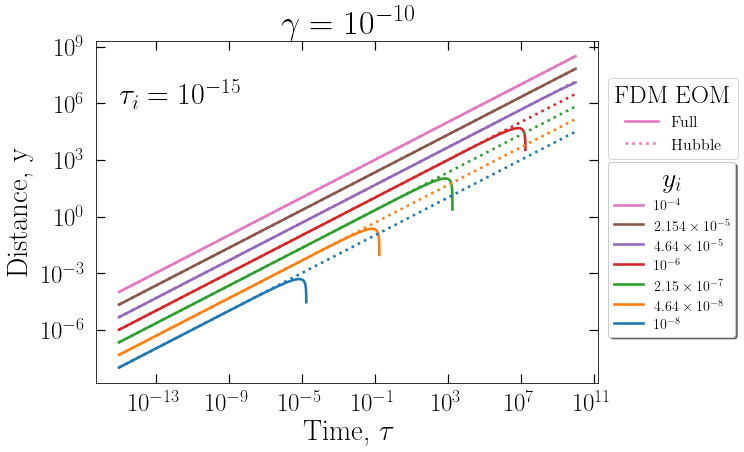

In [8]:
fig, ax = plt.subplots(1, figsize=(9, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')




gamma = 1e-10
tau_f = 1e10
yi_arr = np.geomspace(1e-4, 1e-8, 7)

# Event function for maximum (dy/dtau = 0)
def event_y_max(t, y):
    return y[1]  # Detect when velocity (dy/dtau) is zero
event_y_max.terminal = False  # Do not stop integration here
event_y_max.direction = -1    # Detect decreasing slope (peak reached)
# Event function for minimum (dy/dtau = 0 after y_max)
def event_y_min(t, y):
    return y[1]  # Detect when velocity (dy/dtau) is zero
event_y_min.terminal = True   # Stop integration here
event_y_min.direction = 1     # Detect increasing slope (trough reached)




colors = ['C6','C5','C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (y_i, color) in enumerate(zip(yi_arr, colors)):
    tau_i = 1e-15     
    v_i = y_i/(2 * tau_i) 
    y0 = [y_i, v_i]
    tau_arr = np.geomspace(tau_i, tau_f, 10000) 

    
    sol_fdm_full = solve_ivp(j_fdm_full, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_fdm_hubble = solve_ivp(j_fdm_hubble, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    
    ax.loglog(sol_fdm_full.t, sol_fdm_full.y[0], color = color)
    ax.loglog(sol_fdm_hubble.t, sol_fdm_hubble.y[0],  color = color, ls =':')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["Full", "Hubble"], title = 'FDM EOM',
        title_fontsize = 25, loc = (1.02, 0.655), prop = {"size":16.3})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], [  
              r'$10^{-4}$', r'$ 2.154\times10^{-5}$', r'$4.64\times10^{-5}$', r'$10^{-6}$',r'$2.15\times10^{-7}$',
                r'$4.64\times10^{-8}$',  r'$10^{-8}$'                                                  
              ],prop = {'size':14.2},
              loc = (1.02, 0.135),shadow = True, title = '$y_{i}$' ,title_fontsize = 28,
           facecolor = 'white',fontsize = 28)


ax.add_artist(legend1)
ax.add_artist(legend2)

plt.text(1e-15, 1e6, r'$\tau_i = 10^{-15}$', fontsize = 30)



plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$\gamma = 10^{-10}$', fontsize = 34)
plt.savefig('Diff_shells1.pdf', bbox_inches = 'tight')
plt.show()

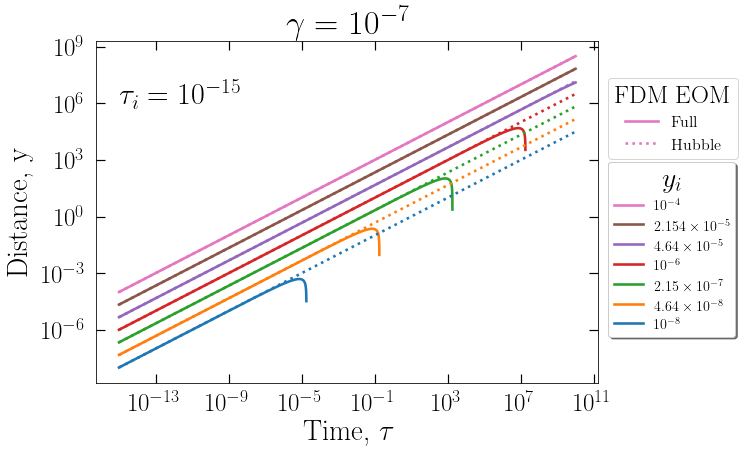

In [4]:
fig, ax = plt.subplots(1, figsize=(9, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')




gamma = 1e-7
tau_f = 1e10
yi_arr = np.geomspace(1e-4, 1e-8, 7)



colors = ['C6','C5','C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (y_i, color) in enumerate(zip(yi_arr, colors)):
    tau_i = 1e-15     
    v_i = y_i/(2 * tau_i) 
    y0 = [y_i, v_i]
    tau_arr = np.geomspace(tau_i, tau_f, 10000) 

    
    sol_fdm_full = solve_ivp(j_fdm_full, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_fdm_hubble = solve_ivp(j_fdm_hubble, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    
    ax.loglog(sol_fdm_full.t, sol_fdm_full.y[0], color = color)
    ax.loglog(sol_fdm_hubble.t, sol_fdm_hubble.y[0],  color = color, ls =':')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["Full", "Hubble"], title = 'FDM EOM',
        title_fontsize = 25, loc = (1.02, 0.655), prop = {"size":16.3})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], [  
              r'$10^{-4}$', r'$ 2.154\times10^{-5}$', r'$4.64\times10^{-5}$', r'$10^{-6}$',r'$2.15\times10^{-7}$',
                r'$4.64\times10^{-8}$',  r'$10^{-8}$'                                                  
              ],prop = {'size':14.2},
              loc = (1.02, 0.135),shadow = True, title = '$y_{i}$' ,title_fontsize = 28,
           facecolor = 'white',fontsize = 28)


ax.add_artist(legend1)
ax.add_artist(legend2)

plt.text(1e-15, 1e6, r'$\tau_i = 10^{-15}$', fontsize = 30)



plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$\gamma = 10^{-7}$', fontsize = 34)
plt.savefig('Diff_shells2.pdf', bbox_inches = 'tight')
plt.show()

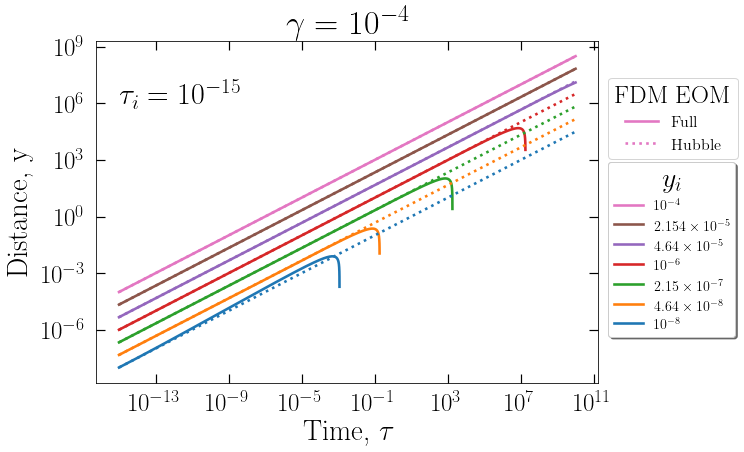

In [5]:
fig, ax = plt.subplots(1, figsize=(9, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')




gamma = 1e-4
tau_f = 1e10
yi_arr = np.geomspace(1e-4, 1e-8, 7)



colors = ['C6','C5','C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (y_i, color) in enumerate(zip(yi_arr, colors)):
    tau_i = 1e-15      
    v_i = y_i/(2 * tau_i) 
    y0 = [y_i, v_i]
    tau_arr = np.geomspace(tau_i, tau_f, 10000) 

    
    sol_fdm_full = solve_ivp(j_fdm_full, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_fdm_hubble = solve_ivp(j_fdm_hubble, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    
    ax.loglog(sol_fdm_full.t, sol_fdm_full.y[0], color = color)
    ax.loglog(sol_fdm_hubble.t, sol_fdm_hubble.y[0],  color = color, ls =':')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["Full", "Hubble"], title = 'FDM EOM',
        title_fontsize = 25, loc = (1.02, 0.655), prop = {"size":16.3})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], [  
              r'$10^{-4}$', r'$ 2.154\times10^{-5}$', r'$4.64\times10^{-5}$', r'$10^{-6}$',r'$2.15\times10^{-7}$',
                r'$4.64\times10^{-8}$',  r'$10^{-8}$'                                                  
              ],prop = {'size':14.2},
              loc = (1.02, 0.135),shadow = True, title = '$y_{i}$' ,title_fontsize = 28,
           facecolor = 'white',fontsize = 28)


ax.add_artist(legend1)
ax.add_artist(legend2)

plt.text(1e-15, 1e6, r'$\tau_i = 10^{-15}$', fontsize = 30)



plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$\gamma = 10^{-4}$', fontsize = 34)
plt.savefig('Diff_shells3.pdf', bbox_inches = 'tight')
plt.show()

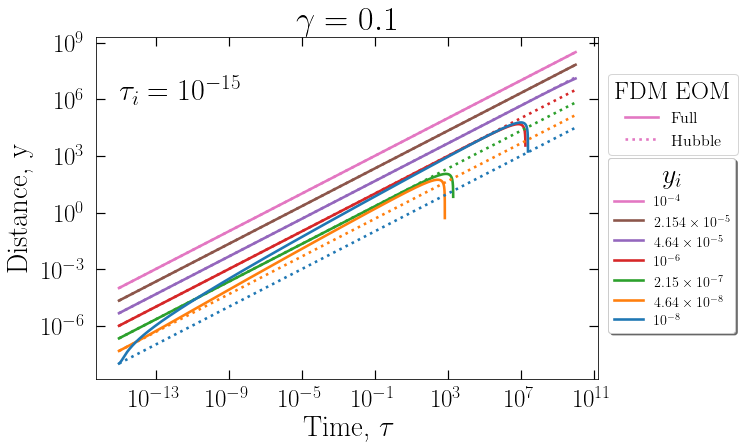

In [6]:
fig, ax = plt.subplots(1, figsize=(9, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')




gamma = 0.1
tau_f = 1e10
yi_arr = np.geomspace(1e-4, 1e-8, 7)



colors = ['C6','C5','C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (y_i, color) in enumerate(zip(yi_arr, colors)):
    tau_i = 1e-15      
    v_i = y_i/(2 * tau_i) 
    y0 = [y_i, v_i]
    tau_arr = np.geomspace(tau_i, tau_f, 10000) 

    
    sol_fdm_full = solve_ivp(j_fdm_full, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_fdm_hubble = solve_ivp(j_fdm_hubble, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    
    ax.loglog(sol_fdm_full.t, sol_fdm_full.y[0], color = color)
    ax.loglog(sol_fdm_hubble.t, sol_fdm_hubble.y[0],  color = color, ls =':')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["Full", "Hubble"], title = 'FDM EOM',
        title_fontsize = 25, loc = (1.02, 0.655), prop = {"size":16.3})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], [  
              r'$10^{-4}$', r'$ 2.154\times10^{-5}$', r'$4.64\times10^{-5}$', r'$10^{-6}$',r'$2.15\times10^{-7}$',
                r'$4.64\times10^{-8}$',  r'$10^{-8}$'                                                  
              ],prop = {'size':14.2},
              loc = (1.02, 0.135),shadow = True, title = '$y_{i}$' ,title_fontsize = 28,
           facecolor = 'white',fontsize = 28)


ax.add_artist(legend1)
ax.add_artist(legend2)

plt.text(1e-15, 1e6, r'$\tau_i = 10^{-15}$', fontsize = 30)



plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$\gamma = 0.1$', fontsize = 34)
plt.savefig('Diff_shells4.pdf', bbox_inches = 'tight')
plt.show()

In [9]:
# Plots of y vs tau for tau_i = 1e-11.

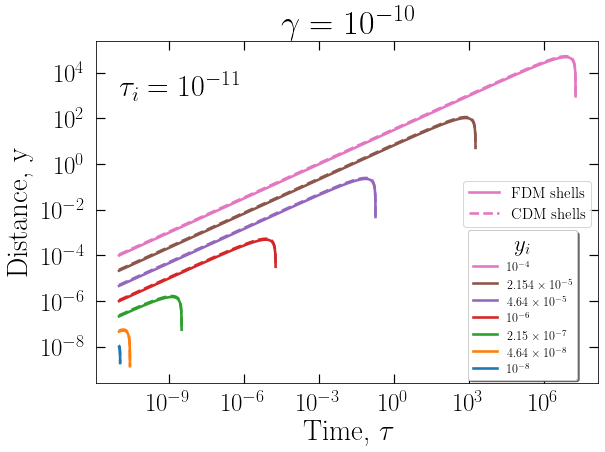

In [11]:
fig, ax = plt.subplots(1, figsize=(9, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')




gamma = 1e-10
tau_f = 1e10
yi_arr = np.geomspace(1e-4, 1e-8, 7)


colors = ['C6','C5','C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (y_i, color) in enumerate(zip(yi_arr, colors)):
    tau_i = 1e-11      
    v_i = y_i/(2 * tau_i) 
    y0 = [y_i, v_i]
    tau_arr = np.geomspace(tau_i, tau_f, 10000) 

    
    sol_fdm = solve_ivp(j_fdm_full, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_cdm = solve_ivp(j_cdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    
    ax.loglog(sol_fdm.t, sol_fdm.y[0], color = color)
    ax.loglog(sol_cdm.t, sol_cdm.y[0]*1.1,  color = color, ls ='--')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["FDM shells", "CDM shells"], title = '',
        title_fontsize = 37, loc = (0.73, 0.455), prop = {"size":15})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], [  
              r'$10^{-4}$', r'$ 2.154\times10^{-5}$', r'$4.64\times10^{-5}$', r'$10^{-6}$',r'$2.15\times10^{-7}$',
                r'$4.64\times10^{-8}$',  r'$10^{-8}$'                                                  
              ],prop = {'size':12.2},
              loc = (0.74, 0.01),shadow = True, title = '$y_{i}$' ,title_fontsize = 23,
           facecolor = 'white',fontsize = 25)
    
ax.add_artist(legend1)
ax.add_artist(legend2)

plt.text(1e-11, 1000, r'$\tau_i = 10^{-11}$', fontsize = 30)



plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$\gamma = 10^{-10}$', fontsize = 34)
plt.savefig('Diff_shells5.pdf', bbox_inches = 'tight')
plt.show()

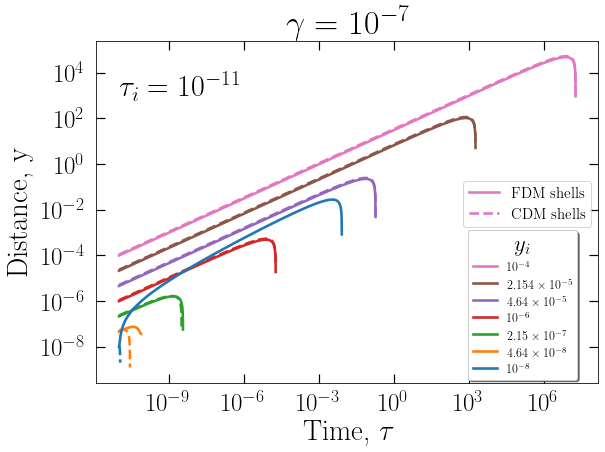

In [13]:
fig, ax = plt.subplots(1, figsize=(9, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')




gamma = 1e-7
tau_f = 1e10
yi_arr = np.geomspace(1e-4, 1e-8, 7)


colors = ['C6','C5','C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (y_i, color) in enumerate(zip(yi_arr, colors)):
    tau_i = 1e-11      
    v_i = y_i/(2 * tau_i) 
    y0 = [y_i, v_i]
    tau_arr = np.geomspace(tau_i, tau_f, 10000) 

    
    sol_fdm = solve_ivp(j_fdm_full, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_cdm = solve_ivp(j_cdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    
    ax.loglog(sol_fdm.t, sol_fdm.y[0], color = color)
    ax.loglog(sol_cdm.t, sol_cdm.y[0]*1.1,  color = color, ls ='--')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["FDM shells", "CDM shells"], title = '',
        title_fontsize = 37, loc = (0.73, 0.455), prop = {"size":15})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], [  
              r'$10^{-4}$', r'$ 2.154\times10^{-5}$', r'$4.64\times10^{-5}$', r'$10^{-6}$',r'$2.15\times10^{-7}$',
                r'$4.64\times10^{-8}$',  r'$10^{-8}$'                                                  
              ],prop = {'size':12.2},
              loc = (0.74, 0.01),shadow = True, title = '$y_{i}$' ,title_fontsize = 23,
           facecolor = 'white',fontsize = 25)
    
ax.add_artist(legend1)
ax.add_artist(legend2)

plt.text(1e-11, 1000, r'$\tau_i = 10^{-11}$', fontsize = 30)



plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$\gamma = 10^{-7}$', fontsize = 34)
plt.savefig('Diff_shells6.pdf', bbox_inches = 'tight')
plt.show()

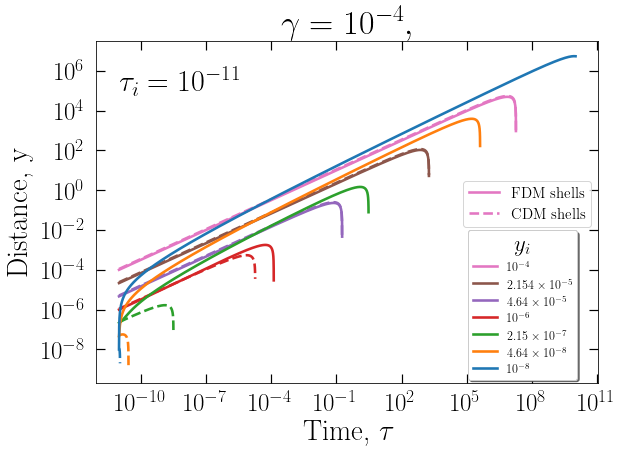

In [14]:
fig, ax = plt.subplots(1, figsize=(9, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')




gamma = 1e-4
tau_f = 1e10
yi_arr = np.geomspace(1e-4, 1e-8, 7)


colors = ['C6','C5','C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (y_i, color) in enumerate(zip(yi_arr, colors)):
    tau_i = 1e-11      
    v_i = y_i/(2 * tau_i) 
    y0 = [y_i, v_i]
    tau_arr = np.geomspace(tau_i, tau_f, 10000) 

    
    sol_fdm = solve_ivp(j_fdm_full, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_cdm = solve_ivp(j_cdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    
    ax.loglog(sol_fdm.t, sol_fdm.y[0], color = color)
    ax.loglog(sol_cdm.t, sol_cdm.y[0]*1.1,  color = color, ls ='--')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["FDM shells", "CDM shells"], title = '',
        title_fontsize = 37, loc = (0.73, 0.455), prop = {"size":15})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], [  
              r'$10^{-4}$', r'$ 2.154\times10^{-5}$', r'$4.64\times10^{-5}$', r'$10^{-6}$',r'$2.15\times10^{-7}$',
                r'$4.64\times10^{-8}$',  r'$10^{-8}$'                                                  
              ],prop = {'size':12.2},
              loc = (0.74, 0.01),shadow = True, title = '$y_{i}$' ,title_fontsize = 23,
           facecolor = 'white',fontsize = 25)
    
ax.add_artist(legend1)
ax.add_artist(legend2)

plt.text(1e-11, 1e5, r'$\tau_i = 10^{-11}$', fontsize = 30)



plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$\gamma = 10^{-4},$', fontsize = 34)
plt.savefig('Diff_shells7.pdf', bbox_inches = 'tight')
plt.show()

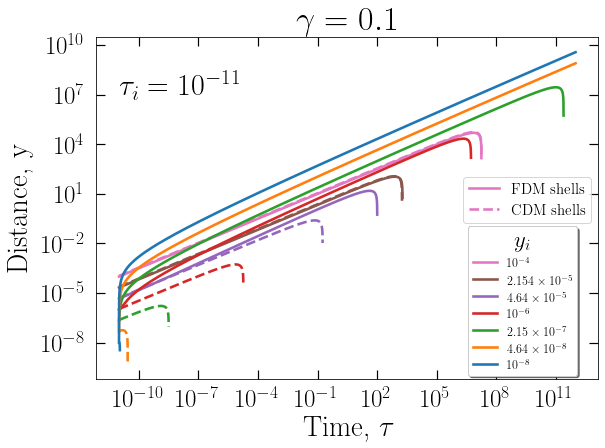

In [15]:
fig, ax = plt.subplots(1, figsize=(9, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')




gamma = 0.1
tau_f = 1e12
yi_arr = np.geomspace(1e-4, 1e-8, 7)


colors = ['C6','C5','C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (y_i, color) in enumerate(zip(yi_arr, colors)):
    tau_i = 1e-11      
    v_i = y_i/(2 * tau_i) 
    y0 = [y_i, v_i]
    tau_arr = np.geomspace(tau_i, tau_f, 10000) 

    
    sol_fdm = solve_ivp(j_fdm_full, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_cdm = solve_ivp(j_cdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    
    ax.loglog(sol_fdm.t, sol_fdm.y[0], color = color)
    ax.loglog(sol_cdm.t, sol_cdm.y[0]*1.1,  color = color, ls ='--')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)
lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["FDM shells", "CDM shells"], title = '',
        title_fontsize = 37, loc = (0.73, 0.455), prop = {"size":15})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]], [  
              r'$10^{-4}$', r'$ 2.154\times10^{-5}$', r'$4.64\times10^{-5}$', r'$10^{-6}$',r'$2.15\times10^{-7}$',
                r'$4.64\times10^{-8}$',  r'$10^{-8}$'                                                  
              ],prop = {'size':12.2},
              loc = (0.74, 0.01),shadow = True, title = '$y_{i}$' ,title_fontsize = 23,
           facecolor = 'white',fontsize = 25)
    
ax.add_artist(legend1)
ax.add_artist(legend2)

plt.text(1e-11, 1e7, r'$\tau_i = 10^{-11}$', fontsize = 30)


plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$\gamma = 0.1$', fontsize = 34)
plt.savefig('Diff_shells8.pdf', bbox_inches = 'tight')
plt.show()

In [16]:
#plots of y vs tau for various values of gamma keeping y_i fixed. 

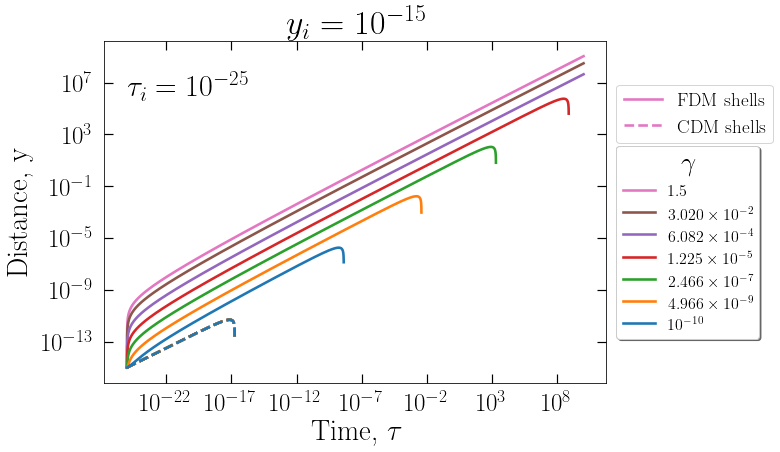

In [55]:
fig, ax = plt.subplots(1, figsize=(9, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')





y_i = 1e-15
tau_i = 1e-25
tau_f = 1e10
tau_arr = np.geomspace(tau_i, tau_f, 10000)
v_i = y_i/(2 * tau_i) 
y0 = [y_i, v_i]


gamma_arr = np.geomspace(1.5, 1e-10, 7)



colors = ['C6','C5', 'C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (gamma, color) in enumerate(zip(gamma_arr, colors)):
    
    sol_fdm = solve_ivp(j_fdm_full, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_cdm = solve_ivp(j_cdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8,  events=[event_y_max, event_y_min])

    
    ax.loglog(sol_fdm.t, sol_fdm.y[0], color = color)
    ax.loglog(sol_cdm.t, sol_cdm.y[0],  color = color, ls ='--')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)
#array([1.00000000e-10, 4.96609713e-09, 2.46621207e-07, 1.22474487e-05,
      # 6.08220200e-04, 3.02048059e-02, 1.50000000e+00])

lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["FDM shells", "CDM shells"], title = '',
        title_fontsize = 37, loc = (1.02, 0.7), prop = {"size":19})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]],  [r'$1.5$',   r'$3.020\times10^{-2}$',  r'$6.082\times10^{-4}$',  r'$1.225\times10^{-5}$',   r'$2.466\times10^{-7}$',
             r'$4.966\times10^{-9}$', r'$10^{-10}$'],prop = {'size':16},
              loc = (1.02, 0.13), shadow = True, title = '$\gamma$' ,title_fontsize = 27,
           facecolor = 'white',fontsize = 25)
    
ax.add_artist(legend1)
ax.add_artist(legend2)



  
plt.text(tau_i, 1e6, r'$\tau_i = 10^{-25}$', fontsize = 30)
#plt.text(1e-25, 1e3, r'$\tau_f = 10^{10}$', fontsize = 30)


plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$y_i = 10^{-15}$', fontsize=34)
plt.savefig('y1.pdf', bbox_inches = 'tight')
plt.show()

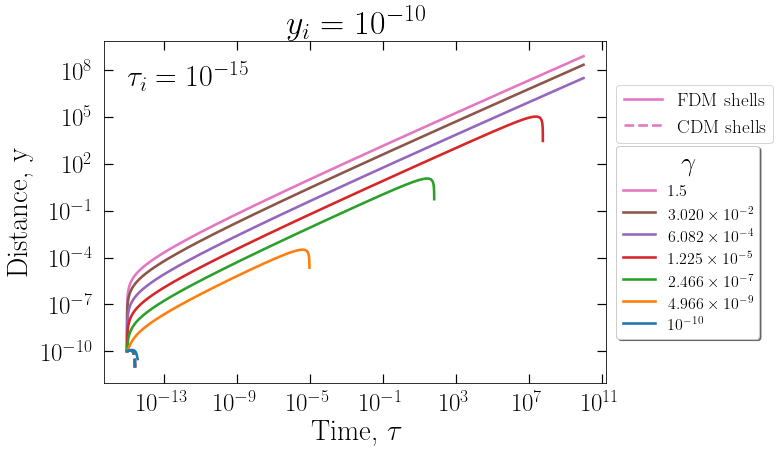

In [56]:
fig, ax = plt.subplots(1, figsize=(9, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')





y_i = 1e-10
tau_i = 1e-15
tau_f = 1e10
tau_arr = np.geomspace(tau_i, tau_f, 10000)
v_i = y_i/(2 * tau_i) 
y0 = [y_i, v_i]


gamma_arr = np.geomspace(1.5, 1e-10, 7)



colors = ['C6','C5', 'C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (gamma, color) in enumerate(zip(gamma_arr, colors)):
    
    sol_fdm = solve_ivp(j_fdm_full, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_cdm = solve_ivp(j_cdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8,  events=[event_y_max, event_y_min])

    
    ax.loglog(sol_fdm.t, sol_fdm.y[0], color = color)
    ax.loglog(sol_cdm.t, sol_cdm.y[0],  color = color, ls ='--')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)

lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["FDM shells", "CDM shells"], title = '',
        title_fontsize = 37, loc = (1.02, 0.7), prop = {"size":19})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]],  [r'$1.5$',   r'$3.020\times10^{-2}$',  r'$6.082\times10^{-4}$',  r'$1.225\times10^{-5}$',   r'$2.466\times10^{-7}$',
             r'$4.966\times10^{-9}$', r'$10^{-10}$'],prop = {'size':16},
              loc = (1.02, 0.13), shadow = True, title = '$\gamma$' ,title_fontsize = 27,
           facecolor = 'white',fontsize = 25)
    
ax.add_artist(legend1)
ax.add_artist(legend2)  
plt.text(tau_i, 1e7, r'$\tau_i = 10^{-15}$', fontsize = 30)
#plt.text(1e-15, 1e5, r'$\tau_f = 10^{10}$', fontsize = 30)



plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$y_i = 10^{-10}$', fontsize=34)
plt.savefig('y2.pdf', bbox_inches = 'tight')
plt.show()

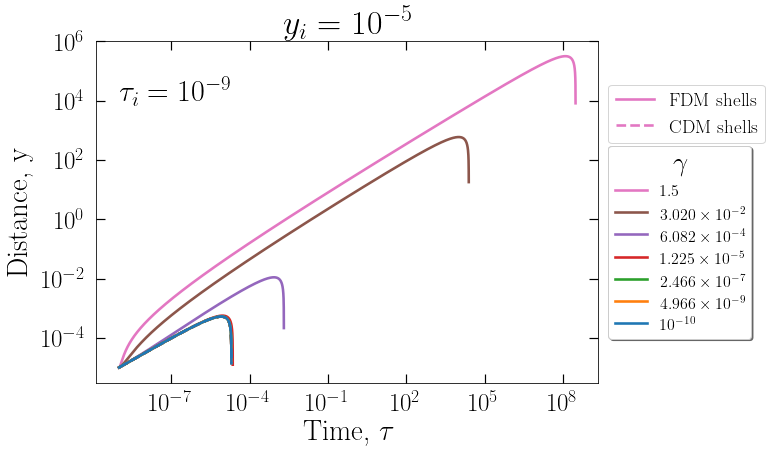

In [57]:
fig, ax = plt.subplots(1, figsize=(9, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')





y_i = 1e-5
tau_i = 1e-9
tau_f = 1e10
tau_arr = np.geomspace(tau_i, tau_f, 10000)
v_i = y_i/(2 * tau_i) 
y0 = [y_i, v_i]


gamma_arr = np.geomspace(1.5, 1e-10, 7)



colors = ['C6','C5', 'C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (gamma, color) in enumerate(zip(gamma_arr, colors)):
    
    sol_fdm = solve_ivp(j_fdm_full, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_cdm = solve_ivp(j_cdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8,  events=[event_y_max, event_y_min])

    
    ax.loglog(sol_fdm.t, sol_fdm.y[0], color = color)
    ax.loglog(sol_cdm.t, sol_cdm.y[0],  color = color, ls ='--')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)

lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["FDM shells", "CDM shells"], title = '',
        title_fontsize = 37, loc = (1.02, 0.7), prop = {"size":19})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]],  [r'$1.5$',   r'$3.020\times10^{-2}$',  r'$6.082\times10^{-4}$',  r'$1.225\times10^{-5}$',   r'$2.466\times10^{-7}$',
             r'$4.966\times10^{-9}$', r'$10^{-10}$'],prop = {'size':16},
              loc = (1.02, 0.13), shadow = True, title = '$\gamma$' ,title_fontsize = 27,
           facecolor = 'white',fontsize = 25)
    
ax.add_artist(legend1)
ax.add_artist(legend2)  
plt.text(tau_i, 1e4, r'$\tau_i = 10^{-9}$', fontsize = 30)
#plt.text(1e-9, 1e3, r'$\tau_f = 10^{10}$', fontsize = 30)


plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$y_i = 10^{-5}$', fontsize=34)
plt.savefig('y3.pdf', bbox_inches = 'tight')
plt.show()

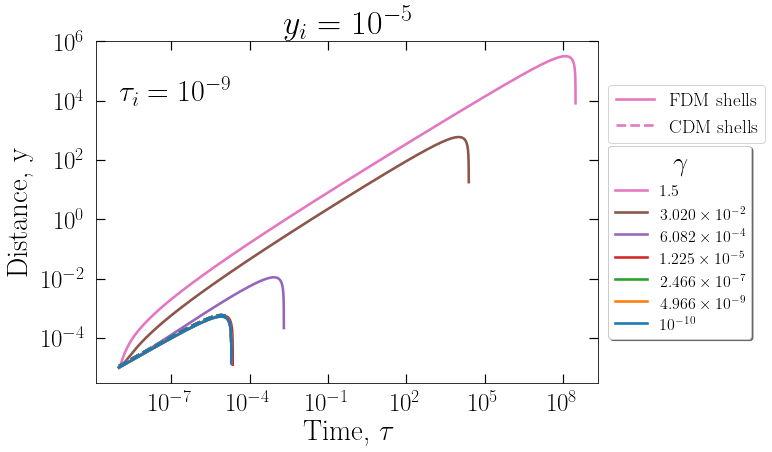

In [61]:
fig, ax = plt.subplots(1, figsize=(9, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')





y_i = 1e-5
tau_i = 1e-9
tau_f = 1e10
tau_arr = np.geomspace(tau_i, tau_f, 10000)
v_i = y_i/(2 * tau_i) 
y0 = [y_i, v_i]


gamma_arr = np.geomspace(1.5, 1e-10, 7)



colors = ['C6','C5', 'C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (gamma, color) in enumerate(zip(gamma_arr, colors)):
    
    sol_fdm = solve_ivp(j_fdm_full, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_cdm = solve_ivp(j_cdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8,  events=[event_y_max, event_y_min])

    
    ax.loglog(sol_fdm.t, sol_fdm.y[0], color = color)
    ax.loglog(sol_cdm.t, sol_cdm.y[0]*1.12,  color = color, ls ='--')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)

lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["FDM shells", "CDM shells"], title = '',
        title_fontsize = 37, loc = (1.02, 0.7), prop = {"size":19})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]],  [r'$1.5$',   r'$3.020\times10^{-2}$',  r'$6.082\times10^{-4}$',  r'$1.225\times10^{-5}$',   r'$2.466\times10^{-7}$',
             r'$4.966\times10^{-9}$', r'$10^{-10}$'],prop = {'size':16},
              loc = (1.02, 0.13), shadow = True, title = '$\gamma$' ,title_fontsize = 27,
           facecolor = 'white',fontsize = 25)
    
ax.add_artist(legend1)
ax.add_artist(legend2) 
  
plt.text(1e-9, 1e4, r'$\tau_i = 10^{-9}$', fontsize = 30)
#plt.text(1e-9, 1e3, r'$\tau_f = 10^{10}$', fontsize = 30)


plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$y_i = 10^{-5}$', fontsize=34)
plt.savefig('y3.pdf', bbox_inches = 'tight')
plt.show()

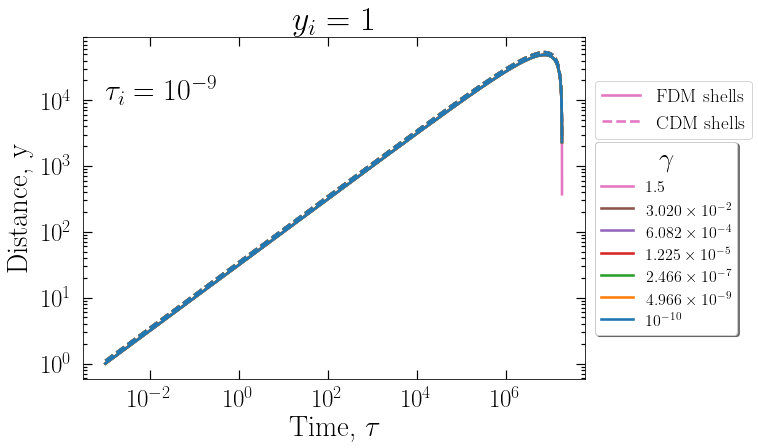

In [62]:
fig, ax = plt.subplots(1, figsize=(9, 6.3))
plt.rc('lines', linewidth=2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis='both', right=True, top=True, which='minor', width=1.2, length=4, direction='in')
plt.tick_params(axis='both', right=True, top=True, which='major', width=1.2, length=9, direction='in')





y_i = 1
tau_i = 1e-3
tau_f = 1e10
tau_arr = np.geomspace(tau_i, tau_f, 10000)
v_i = y_i/(2 * tau_i) 
y0 = [y_i, v_i]


gamma_arr = np.geomspace(1.5, 1e-10, 7)



colors = ['C6','C5', 'C4', 'C3', 'C2', 'C1', 'C0'] 
for i, (gamma, color) in enumerate(zip(gamma_arr, colors)):
    
    sol_fdm = solve_ivp(j_fdm_full, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8, events=[event_y_max, event_y_min])

    sol_cdm = solve_ivp(j_cdm, [tau_i, tau_f], y0, t_eval=tau_arr, method='RK45',
        rtol=1e-6, atol=1e-8,  events=[event_y_max, event_y_min])

    
    ax.loglog(sol_fdm.t, sol_fdm.y[0], color = color)
    ax.loglog(sol_cdm.t, sol_cdm.y[0]*1.1,  color = color, ls ='--')

    
 
    
ax.tick_params(axis ='x', pad = 9.9)
ax.tick_params(axis ='y', pad = 9.9)

lines = ax.get_lines()
legend1 = plt.legend([lines[i] for i in [0, 1]], ["FDM shells", "CDM shells"], title = '',
        title_fontsize = 37, loc = (1.02, 0.7), prop = {"size":19})
legend2 = plt.legend([lines[i] for i in [0, 2, 4, 6, 8, 10, 12]],  [r'$1.5$',   r'$3.020\times10^{-2}$',  r'$6.082\times10^{-4}$',  r'$1.225\times10^{-5}$',   r'$2.466\times10^{-7}$',
             r'$4.966\times10^{-9}$', r'$10^{-10}$'],prop = {'size':16},
              loc = (1.02, 0.13), shadow = True, title = '$\gamma$' ,title_fontsize = 27,
           facecolor = 'white',fontsize = 25)
    
ax.add_artist(legend1)
ax.add_artist(legend2) 
  
plt.text(1e-3, 1e4, r'$\tau_i = 10^{-9}$', fontsize = 30)
#plt.text(1e-3, 3e3, r'$\tau_f = 10^{10}$', fontsize = 30)


plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau$', fontsize=29)
plt.ylabel('Distance, y', fontsize=29, labelpad=9)
plt.title(r'$y_i = 1$', fontsize=34)
plt.savefig('y4.pdf', bbox_inches = 'tight')
plt.show()

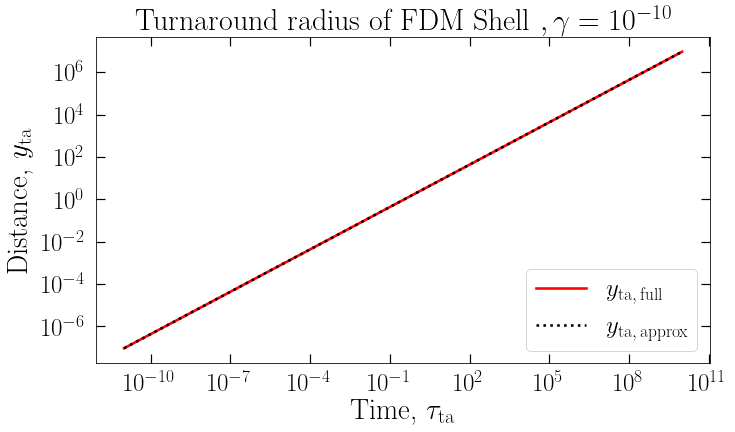

In [70]:
# Turnaround radius of FDM shell when the quantum pressure 
# of FDM Bosons is considered negligible under the assumption 
# that the typical size of the solitonic radius should always much 
# smaller than the typical size of the Turnaround radius of FDM shell around a PBH. 
# This eq. is similar to eq.(5) in reference
# "WIMPs and stellar-mass primordial black holes are incompatible".
# Also calculated as the Turnaround radius of CDM shells in the first project. 



# Turnaround radius of the FDM shell around PBH of mass M_pbh.



# Ignoring the gamma term for much smaller values of gamma which coincides
# with the turnaround of CDM shell around the PBH of mass M

#here, tau = tau_ta

gamma = 1e-10

def r_turnaround_approx(tau):  
    return (8  * (tau**(2)))**(1/3)



def r_turnaround_full(tau, gamma): 
    def expression(y_ta):
        return (y_ta**4) - (8 * y_ta * (tau**2)) + ((2*gamma - gamma**2) * (tau**2))
    r_ta_initial = max(r_turnaround_approx(tau), 1e-2)
    r_ta_solution = fsolve(expression, r_ta_initial,  xtol=1e-10)
    return r_ta_solution[0]




tau_arr = np.linspace(1e-11, 1e10, 1000)

fig,ax = plt.subplots(1, figsize = (11, 6))
plt.rc('lines', linewidth = 2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


plt.loglog(tau_arr, [r_turnaround_full(tau, gamma) for tau in tau_arr],'r', linestyle = '-')
plt.loglog(tau_arr, r_turnaround_approx(tau_arr),'k', linestyle = ':')

ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)

plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau_\mathrm{ta}$', fontsize=29)
plt.ylabel('Distance, $y_\mathrm{ta}$', fontsize=29, labelpad=9)
plt.legend([ '$y_\mathrm{ta,\,full}$', '$y_\mathrm{ta,\,approx}$'],
            title_fontsize = 20, loc = 'lower right', prop = {"size":25})
plt.title(r'Turnaround radius of FDM Shell $, \gamma = 10^{-10}$', fontsize = 30)
plt.savefig("y_ta.pdf", bbox_inches = "tight")
plt.show()

/home/pratibhajangra/miniconda3/envs/PhD/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/pratibhajangra/miniconda3/envs/PhD/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/home/pratibhajangra/miniconda3/envs/PhD/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/home/pratibhajangra/miniconda3/envs/PhD/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last fi

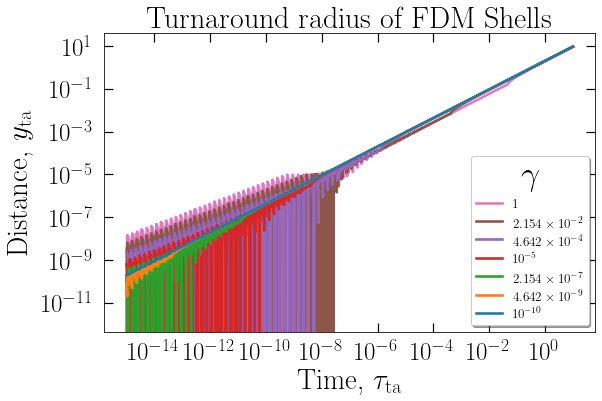

In [71]:
fig,ax = plt.subplots(1, figsize = (8.8, 5.5))
plt.rc('lines', linewidth = 2.6)
plt.rcParams['font.family'] = 'serif'
plt.tick_params(axis = 'both', right=True, top=True, which = 'minor', width= 1.2, length = 4, direction = 'in')
plt.tick_params(axis = 'both', right=True, top=True, which = 'major', width= 1.2, length = 9, direction = 'in')


tau_arr = np.geomspace(1e-15, 10, 10000)
gamma_arr = np.geomspace(1 , 1e-10, 7)



colors = ['C6','C5','C4', 'C3','C2', 'C1','C0']
for i, (gamma, color) in enumerate(zip(gamma_arr, colors)):
    ax.loglog(tau_arr, [r_turnaround_full(tau, gamma) for tau in tau_arr], color =color)
    

    
ax.tick_params(axis='x', pad = 9.9)
ax.tick_params(axis='y', pad = 9.9)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel(r'Time, $\tau_\mathrm{ta}$', fontsize=29)
plt.ylabel('Distance, $y_\mathrm{ta}$', fontsize=29, labelpad=9)
plt.legend( [r'$1$', r'$2.154\times10^{-2}$',  r'$4.642\times10^{-4}$', r'$10^{-5}$', r'$2.154\times10^{-7}$',
    r'$ 4.642\times10^{-9}$', r'$10^{-10}$'],prop = {'size':13.2}, loc = 'lower right',shadow = True, title = '$\gamma$' ,title_fontsize = 34,
           facecolor = 'white',fontsize = 25)
plt.title(r'Turnaround radius of FDM Shells', fontsize = 30)
plt.savefig("yta_diffshells.pdf", bbox_inches = "tight")
plt.show()